# Capstone Project - Project OnlineRetail

# Table of Contents

1. Problem Statement
2. Project Objective
3. Data Description
4. Data Pre-processing Steps and Inspiration
5. Choosing the Algorithm for the Project
6. Motivation and Reasons For Choosing the Algorithm
7. Assumptions
8. Model Evaluation and Techniques
9. Inferences from the Same
10. Future Possibilities of the Project
11. Conclusion
12. References

# Problem Statement

An online retail store is trying to identify Customer Segmentation or Market Segmentation. This will enable firm to understand the various customer purchase patterns for their firm.

# Data Description

This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.

InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.

StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.

Description: Product (item) name. Nominal.

Quantity: The quantities of each product (item) per transaction. Numeric.

InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.

UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£).

CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.

Country: Country name. Nominal. The name of the country where a customer resides.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date

In [2]:
df = pd.read_csv('OnlineRetail_capstone.csv', encoding='latin1')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


By using the df.describe() function we came to know that our minimum quantity is in negative and we all know that a quantity will never be in Negative. So, in subsequent steps we have to remove this redundancy in order to get better accuracy because redundancy can cause miss grouping of data.We will take this up as part of Data Pre-processing

# Data Pre-processing Steps and Inspiration

Rearranging columns

In [6]:
df = df[['CustomerID','InvoiceNo','StockCode','Description','Quantity','UnitPrice','InvoiceDate','Country']]

In [7]:
print(df.columns)
print(df.index)

Index(['CustomerID', 'InvoiceNo', 'StockCode', 'Description', 'Quantity',
       'UnitPrice', 'InvoiceDate', 'Country'],
      dtype='object')
RangeIndex(start=0, stop=541909, step=1)


In [8]:
df.head()

,CustomerID,InvoiceNo,StockCode,Description,Quantity,UnitPrice,InvoiceDate,Country
0,17850.0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,12/1/2010 8:26,United Kingdom
1,17850.0,536365,71053,WHITE METAL LANTERN,6,3.39,12/1/2010 8:26,United Kingdom
2,17850.0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,12/1/2010 8:26,United Kingdom
3,17850.0,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,12/1/2010 8:26,United Kingdom
4,17850.0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,12/1/2010 8:26,United Kingdom


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CustomerID   406829 non-null  float64
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  540455 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   UnitPrice    541909 non-null  float64
 6   InvoiceDate  541909 non-null  object 
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [10]:
df.isnull().sum()

CustomerID     135080
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
UnitPrice           0
InvoiceDate         0
Country             0
dtype: int64

Here, Invoice date is object type. We will convert this into datetime for calculating all the values. Further, we are addressing negative value of Qunatity and Unitprice. 

In [11]:
df['CustomerID'] = df.CustomerID.astype('str')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.dropna(subset=['CustomerID'])
df = df[(df.Quantity>0) & (df.UnitPrice>0)]
ref = df.copy()
df.describe()

,Quantity,UnitPrice
count,530104.000000,530104.000000
mean,10.542037,3.907625
std,155.524124,35.915681
min,1.000000,0.001000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,13541.330000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530104 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   CustomerID   530104 non-null  object        
 1   InvoiceNo    530104 non-null  object        
 2   StockCode    530104 non-null  object        
 3   Description  530104 non-null  object        
 4   Quantity     530104 non-null  int64         
 5   UnitPrice    530104 non-null  float64       
 6   InvoiceDate  530104 non-null  datetime64[ns]
 7   Country      530104 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 36.4+ MB


In [13]:
ref.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530104 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   CustomerID   530104 non-null  object        
 1   InvoiceNo    530104 non-null  object        
 2   StockCode    530104 non-null  object        
 3   Description  530104 non-null  object        
 4   Quantity     530104 non-null  int64         
 5   UnitPrice    530104 non-null  float64       
 6   InvoiceDate  530104 non-null  datetime64[ns]
 7   Country      530104 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 36.4+ MB


In [14]:
df.shape

(530104, 8)

In [15]:
ref.InvoiceDate.describe()

C:\Users\Admin\AppData\Local\Temp/ipykernel_14080/2240799462.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  ref.InvoiceDate.describe()


count                  530104
unique                  18499
top       2011-10-31 14:41:00
freq                     1114
first     2010-12-01 08:26:00
last      2011-12-09 12:50:00
Name: InvoiceDate, dtype: object

In [16]:
ref.Country.nunique()

38

Lets analyze the sales performance of this company

Here , we calculate Monetary Value i.e Total price i.e Here we are getting our monetary value by grouping customer with their customer id and total no. of sales.


In [17]:
ref['totalprice'] = ref['Quantity']*ref['UnitPrice']
ref['Year'] =  pd.DatetimeIndex(ref['InvoiceDate']).year
ref['month'] = pd.DatetimeIndex(ref['InvoiceDate']).month

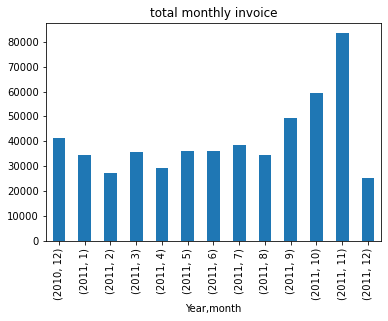

In [18]:
ref.groupby(['Year','month']).InvoiceNo.count().plot(kind='bar',title='total monthly invoice')
plt.show()

lets find total number of customers and their distribution

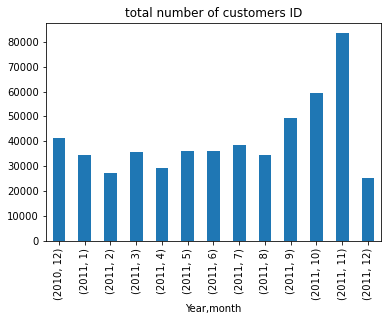

In [19]:
ref.groupby(['Year','month']).CustomerID.count().plot(kind='bar',title='total number of customers ID')
plt.show()

Total number of Quantity

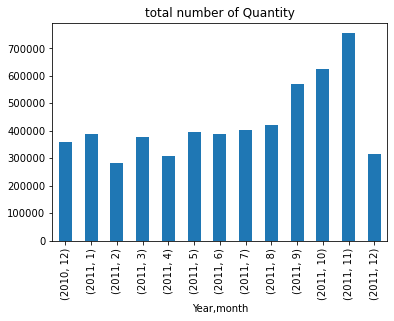

In [20]:
ref.groupby(['Year','month']).Quantity.sum().plot(kind='bar',title='total number of Quantity')
plt.show()

Total amount of sales (top 10 Country)

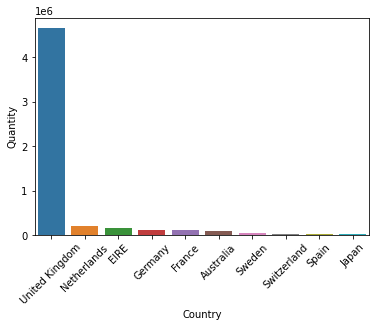

In [21]:
country_sales  = pd.DataFrame(ref.groupby(['Country'])['Quantity'].sum().sort_values(ascending=False).reset_index()[:10])
sns.barplot(x = country_sales['Country'],y = country_sales['Quantity'])
plt.xticks(rotation=45)
plt.show()

Total amount of sales (lowest 5 Country)

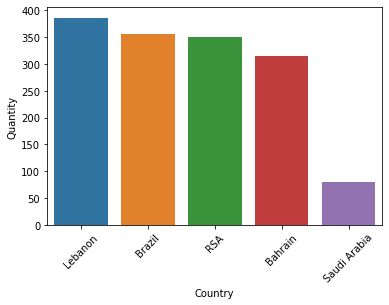

In [22]:
lastcountry_sales  = pd.DataFrame(ref.groupby(['Country'])['Quantity'].sum().sort_values(ascending=False).reset_index()[33:])
sns.barplot(x = lastcountry_sales['Country'],y = lastcountry_sales['Quantity'])
plt.xticks(rotation=45)
plt.show()

Revenue per year

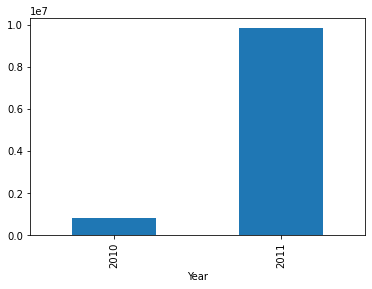

In [23]:
ref.groupby(['Year']).totalprice.sum().plot(kind='bar')
plt.show()

Total sales per month

Year  month
2010  12        823746.140
2011  1         691364.560
      2         523631.890
      3         717639.360
      4         537808.621
      5         770536.020
      6         761739.900
      7         719221.191
      8         759138.380
      9        1058590.172
      10       1154979.300
      11       1509496.330
      12        638792.680
Name: totalprice, dtype: float64


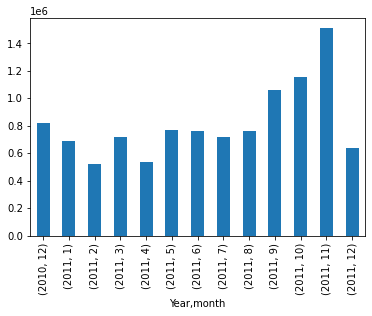

In [24]:
totalsales = ref.groupby(['Year','month']).totalprice.sum()
print(totalsales)
totalsales.plot(kind='bar')
plt.show()

# Choosing the Algorithm for the Project

Here we will adopt K means clustering technique. The goal of K means is to group data points into distinct non-overlapping subgroups. We will divide the whole data of customers on the basis of RMF i.e. Recency, Monetary and Frequency and we will also visualize these groups on the basis of these 3 terms. This segmentation will help us to get a better understanding of customers which in turn could be used to increase the revenue of the company.

Recency:- It represents how recently a customer purchased a product.

Frequency:- It represents how often a customer purchased a product. The more frequent will be the better score.

Monetary:- It represents how much an customer spends

In [25]:
#Calculate our Monetary Value

In [26]:
df["Sale"] =df.Quantity * df.UnitPrice

In [27]:
df.head()

,CustomerID,InvoiceNo,StockCode,Description,Quantity,UnitPrice,InvoiceDate,Country,Sale
0,17850.0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,2010-12-01 08:26:00,United Kingdom,15.30
1,17850.0,536365,71053,WHITE METAL LANTERN,6,3.39,2010-12-01 08:26:00,United Kingdom,20.34
2,17850.0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,2010-12-01 08:26:00,United Kingdom,22.00
3,17850.0,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,2010-12-01 08:26:00,United Kingdom,20.34
4,17850.0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,2010-12-01 08:26:00,United Kingdom,20.34


In [28]:
monetary =df.groupby("CustomerID").Sale.sum()

#resetting our index,our monetary has multiindex so we are removing it

In [29]:
monetary = monetary.reset_index()

In [30]:
monetary.head()

,CustomerID,Sale
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [31]:
# Calculate frequency

In [32]:
frequency=df.groupby("CustomerID").InvoiceNo.count()

In [33]:
frequency = frequency.reset_index()
#resetting our index,our frequency has multiindex so we are removing it

In [34]:
frequency.head()

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [35]:
# Calculate Recency

In [36]:
LastDate=max(df.InvoiceDate) #calculating the last date of InvoiceDate

In [37]:
LastDate = LastDate + pd.DateOffset(days=1)
#adding one to LastDate

In [38]:
LastDate

Timestamp('2011-12-10 12:50:00')

In [39]:
df["Diff"] = LastDate - df.InvoiceDate

#Diff is the difference between our Lastate and InvoiceData

In [40]:
recency = df.groupby("CustomerID").Diff.min()
"""
here we get our recency value using group by 
"""
recency = recency.reset_index()
recency.head()

,CustomerID,Diff
0,12346.0,326 days 02:49:00
1,12347.0,2 days 20:58:00
2,12348.0,75 days 23:37:00
3,12349.0,19 days 02:59:00
4,12350.0,310 days 20:49:00


In [41]:
#creating a combined df for combined to Recency, monetary and Frequency

In [42]:
#comnining all dataframes into one
rmf = monetary.merge(frequency, on = "CustomerID")
rmf = rmf.merge(recency, on = "CustomerID")
rmf.columns = ["CustomerID", "Monetary", "Frequence", "Recency"]
rmf
RMF1 = rmf.drop("CustomerID",axis =1) 
#dropping customer id and storing it into RMF1
RMF1.Recency = RMF1.Recency.dt.days
RMF1

,Monetary,Frequence,Recency
0,77183.60,1,326
1,4310.00,182,2
2,1797.24,31,75
3,1757.55,73,19
4,334.40,17,310
...,...,...,...
4334,80.82,7,181
4335,178.05,12,8
4336,2094.88,756,4
4337,1837.28,70,43


In [43]:
from sklearn.cluster import KMeans

In [44]:
ssd = []
for k in range(1,20):
    km = KMeans(n_clusters=k)
    km.fit(RMF1)
    ssd.append(km.inertia_)

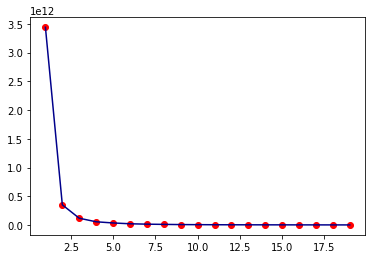

In [45]:
plt.plot(np.arange(1,20), ssd,color="darkblue")
plt.scatter(np.arange(1,20), ssd,color="red")
plt.show()

In the KMean algo we are using elbow method to find the no. of clustering groups. From above 5 is ideal value for k

In [46]:
model = KMeans(n_clusters=5)
ClusterID = model.fit_predict(RMF1)

In [47]:
ClusterID
RMF1["ClusterID"] = ClusterID
RMF1

,Monetary,Frequence,Recency,ClusterID
0,77183.60,1,326,3
1,4310.00,182,2,0
2,1797.24,31,75,0
3,1757.55,73,19,0
4,334.40,17,310,0
...,...,...,...,...
4334,80.82,7,181,0
4335,178.05,12,8,0
4336,2094.88,756,4,0
4337,1837.28,70,43,0


<AxesSubplot:ylabel='Recency'>

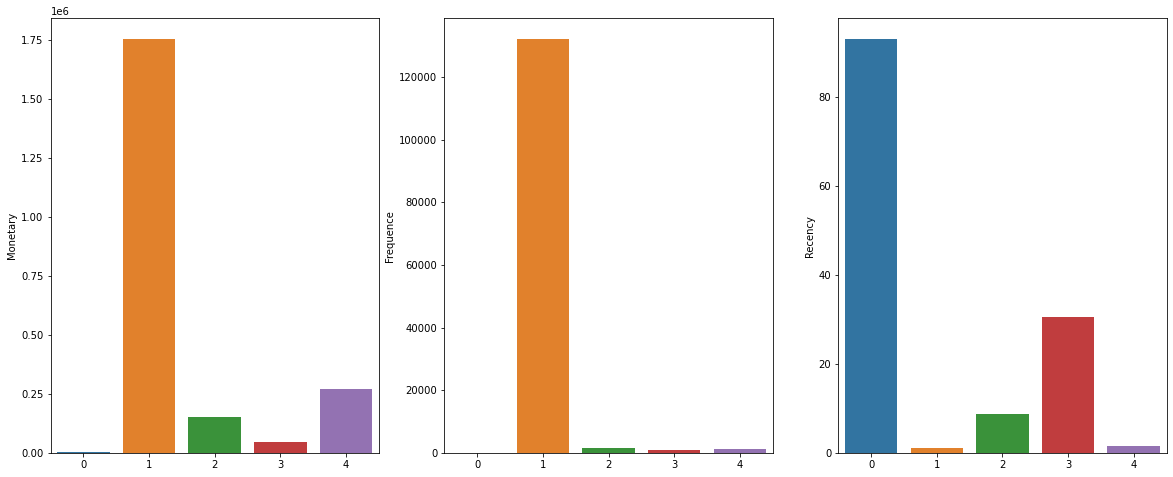

In [48]:
km_cluster_sale =RMF1.groupby("ClusterID").Monetary.mean()
km_cluster_Recency =RMF1.groupby("ClusterID").Recency.mean()
km_cluster_Frequence =RMF1.groupby("ClusterID").Frequence.mean()
km_cluster_sale

import seaborn as sns
#first we are plotting bar chart 
fig, axs = plt.subplots(1,3, figsize = (20, 8))
sns.barplot(x = [0,1,2,3,4],  y = km_cluster_sale , ax = axs[0])
sns.barplot(x = [0,1,2,3,4],  y = km_cluster_Frequence , ax = axs[1])
sns.barplot(x = [0,1,2,3,4],  y = km_cluster_Recency , ax = axs[2])

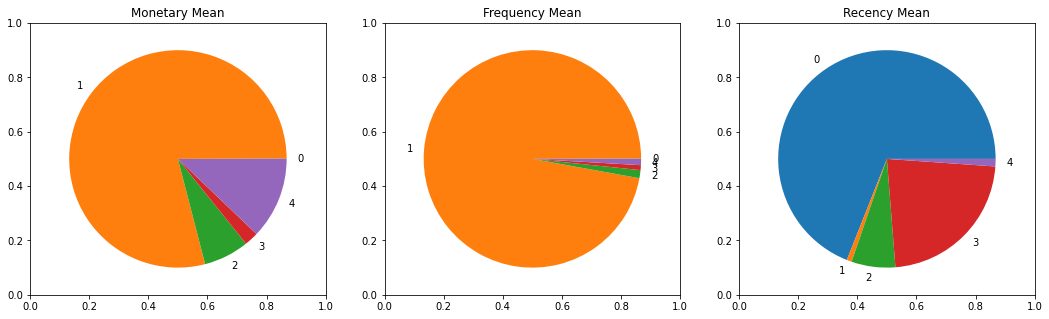

In [49]:
#now we are plotting pie-chart
fig,axis = plt.subplots(1,3, figsize =(18,5))
ax1 =fig.add_subplot(1,3,1)
plt.title("Monetary Mean")
ax1.pie(km_cluster_sale, labels =[0,1,2,3,4])
ax1 =fig.add_subplot(1,3,2)
plt.title("Frequency Mean")
ax1.pie(km_cluster_Frequence, labels =[0,1,2,3,4])
ax1 =fig.add_subplot(1,3,3)
plt.title("Recency Mean")
ax1.pie(km_cluster_Recency, labels =[0,1,2,3,4])

#ax1.axis("off")
plt.show()

In [ ]:
##saving the model

In [50]:
import pickle
# save the model to disk
filename = 'finalized_OnlineRetail_model.sav'
pickle.dump(model, open(filename, 'wb'))

# Inferences 

On basis of Preprocessing Visualization
1. This company is more into online retail across 38 countries.
2. We should continue cooperation with EIRE, Germany, France, Australia and change relationships with Saudi Arabia
3. The best sales month in November 2011
4. We can concentrate on improving the sales for the other 8 months
5. We see that september to december we have very high sales so we can concentrate on improving the sales for the other 8 months

On basis of Segmentation after adoption of Kmeans
From the above pie chart we can easily understand our 5 groups according to Recency mean,Frequency mean and Monetary mean.

Group 1 is the group of customer who spends maximum amount of money and also has a good frequency and low recency rate.
Group 4 are the customers whose frequency rate is maximum and monetary value is also good and recency rate is also quite good, whereas Group 0 is the group of customers who has a very high recency rate means they have not purchased anything from the past.

https://towardsdatascience.com/customer-segmentation-unsupervised-machine-learning-algorithms-in-python-3ae4d6cfd41d